In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [9]:
df = pdr.get_data_yahoo('TSLA', '2000-01-01')

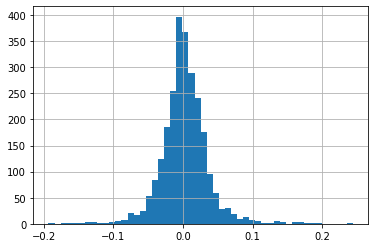

In [11]:
df['Close'].pct_change().hist(bins=50)

In [12]:
# 30 days is a good approximation of a single month
df['30d mavg'] = df['Close'].rolling(window=30).mean()
df['30d std'] = df['Close'].rolling(window=30).std()

df['Upper Band'] = df['30d mavg'] + (df['30d std'] * 2)
df['Lower Band'] = df['30d mavg'] - (df['30d std'] * 2)

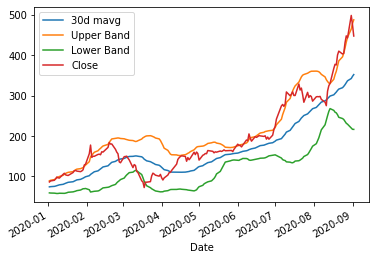

In [13]:
cols = ['30d mavg','Upper Band','Lower Band', 'Close']
        
df_Boll = df[cols]['2020']
df_Boll.plot()

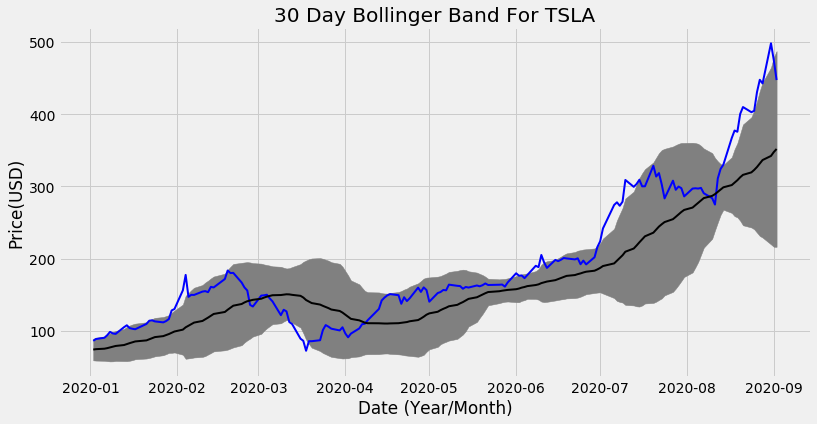

In [25]:
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df_Boll.index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df_Boll['Upper Band'], 
                df_Boll['Lower Band'], 
                color='grey')

ax.plot(x_axis, df_Boll['Close'], color='blue', lw=2)
ax.plot(x_axis, df_Boll['30d mavg'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For TSLA')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')

plt.show();

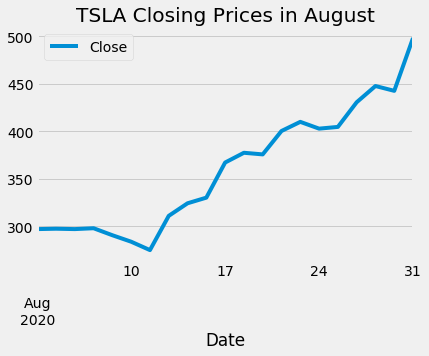

In [27]:
df.loc['Aug 2020'].plot(y = 'Close', title='TSLA Closing Prices in August')

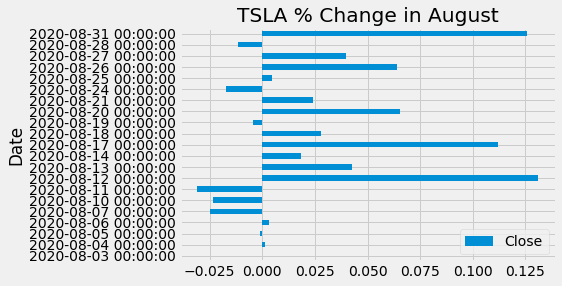

In [57]:
df.loc['Aug 2020'].pct_change().plot(y = 'Close', title='TSLA % Change in August', kind='barh')

In [63]:
def profit(date_purchased, shares):
    profit = df.tail(1)['Close'][0] * int(shares) - df.loc[date_purchased]['Close'] * int(shares)
    return "You would have made $" + "{:.2f}".format(profit)

date_purchased_in = input("When did you purchase the stocks?\n")
shares_in = input("How many shares did you buy?\n")
print(profit(date_purchased_in, shares_in))

When did you purchase the stocks?
Dec 5 2019
How many shares did you buy?
200
You would have made $76259.20
